In [ ]:
import numpy as np
import pywt
import cv2 as cv
import pywt.data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:

img =cv.imread("Alzheimer_s Dataset/train/NonDemented/nonDem0.jpg",0)

In [ ]:
'''
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgResize = cv2.resize(image, (200, 200))
blur = cv2.GaussianBlur(imgResize,(5,5),0)
imgSegmented = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
imgCanny=cv2.Canny(imgSegmented,50,50)
'''

## Preprocessing

In [ ]:
imgResize = cv.resize(img, (200, 200))

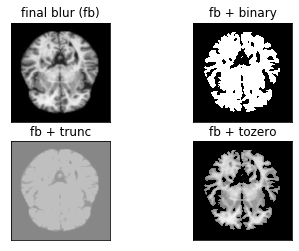

In [ ]:
blur = cv.GaussianBlur(imgResize, (5, 5), 0)
img = cv.cvtColor(blur, 0)
ret, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 120, 255, cv.THRESH_TRUNC)
ret, thresh3 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO)
                             
plt.subplot(221),plt.imshow(img),plt.title('final blur (fb)')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh1),plt.title('fb + binary')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(thresh2),plt.title('fb + trunc')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(thresh3),plt.title('fb + tozero')
plt.xticks([]), plt.yticks([])
plt.show()

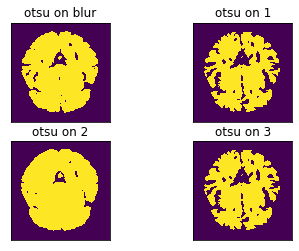

In [ ]:
# img = img.astype("uint8")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# thresh1 = thresh1.astype("uint8")
thresh1 = cv.cvtColor(thresh1, cv.COLOR_BGR2GRAY)
# thresh2 = thresh2.astype("uint8")
thresh2 = cv.cvtColor(thresh2, cv.COLOR_BGR2GRAY)
#thresh3 = thresh3.astype("uint8")
thresh3 = cv.cvtColor(thresh3, cv.COLOR_BGR2GRAY)
ret5, imgSeg1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, imgSeg2 = cv.threshold(thresh1, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, imgSeg3 = cv.threshold(thresh2, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret4, imgSeg4 = cv.threshold(thresh3, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(221),plt.imshow(imgSeg1),plt.title('otsu on blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(imgSeg2),plt.title('otsu on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(imgSeg3),plt.title('otsu on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(imgSeg4),plt.title('otsu on 3')
plt.xticks([]), plt.yticks([])
plt.show()

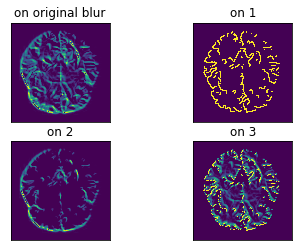

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)

img_prewitt1x = cv.filter2D(thresh1, -1, kernelx)
img_prewitt1y = cv.filter2D(thresh1, -1, kernely)

img_prewitt2x = cv.filter2D(thresh2, -1, kernelx)
img_prewitt2y = cv.filter2D(thresh2, -1, kernely)

img_prewitt3x = cv.filter2D(thresh3, -1, kernelx)
img_prewitt3y = cv.filter2D(thresh3, -1, kernely)

plt.subplot(221),plt.imshow(img_prewitty+img_prewittx),plt.title('on original blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_prewitt1y+img_prewitt1x),plt.title('on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_prewitt2y+img_prewitt2x),plt.title('on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_prewitt3y+img_prewitt3x),plt.title('on 3')
plt.xticks([]), plt.yticks([])
plt.show()

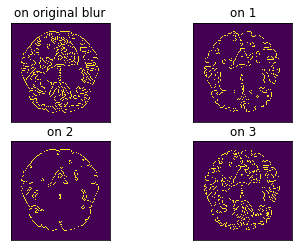

In [ ]:
img_cannyO = cv.Canny(img,100,200)
img_canny1 = cv.Canny(thresh1,100,200)
img_canny2 = cv.Canny(thresh2,100,200)
img_canny3 = cv.Canny(thresh3,100,200)

plt.subplot(221),plt.imshow(img_cannyO),plt.title('on original blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_canny1),plt.title('on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_canny2),plt.title('on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_canny3),plt.title('on 3')
plt.xticks([]), plt.yticks([])
plt.show()

## Wavelet on img_canny0

In [ ]:
c=pywt.wavedec2(img_cannyO,'db5',mode='periodization',level=2)

In [ ]:
imgr=pywt.waverec2(c,'db5',mode='periodization')
imgr=np.uint8(imgr)

In [ ]:
cA2=c[0]#Approximation coefficient
(cH1,cV1,cD1)=c[-1]#Detailed coefficients at level 1
(cH2,cV2,cD2)=c[-2]#Detailed coefficients at level 2

Text(0.5, 1.0, 'cD2: Diagonal Detailed coeff.')

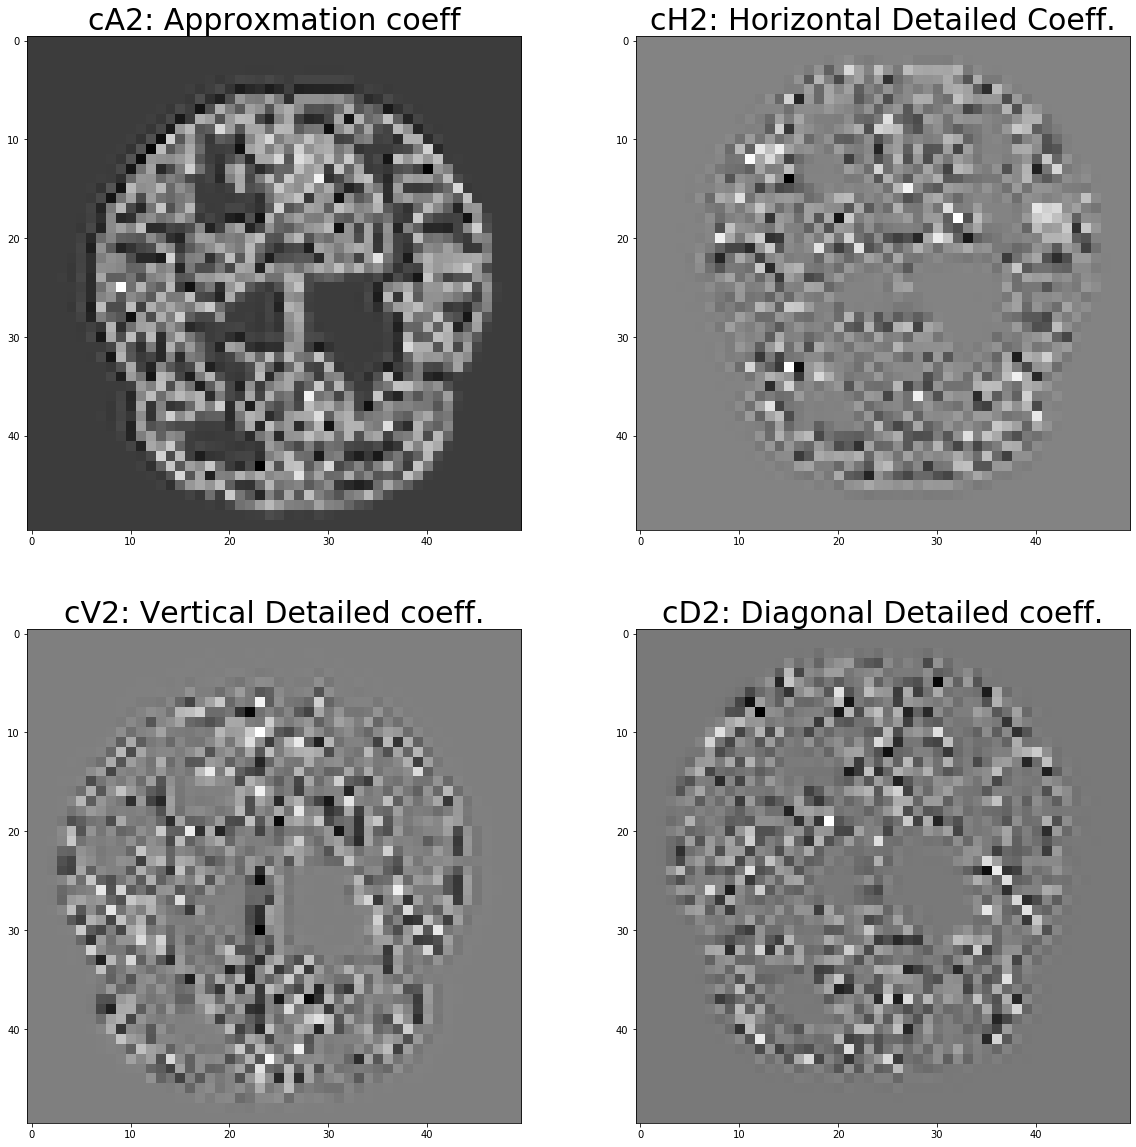

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap=plt.cm.gray)
plt.title('cA2: Approxmation coeff',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap=plt.cm.gray)
plt.title('cH2: Horizontal Detailed Coeff.',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.',fontsize=30)




Text(0.5, 1.0, 'All wavelet coeffs upto level 2')

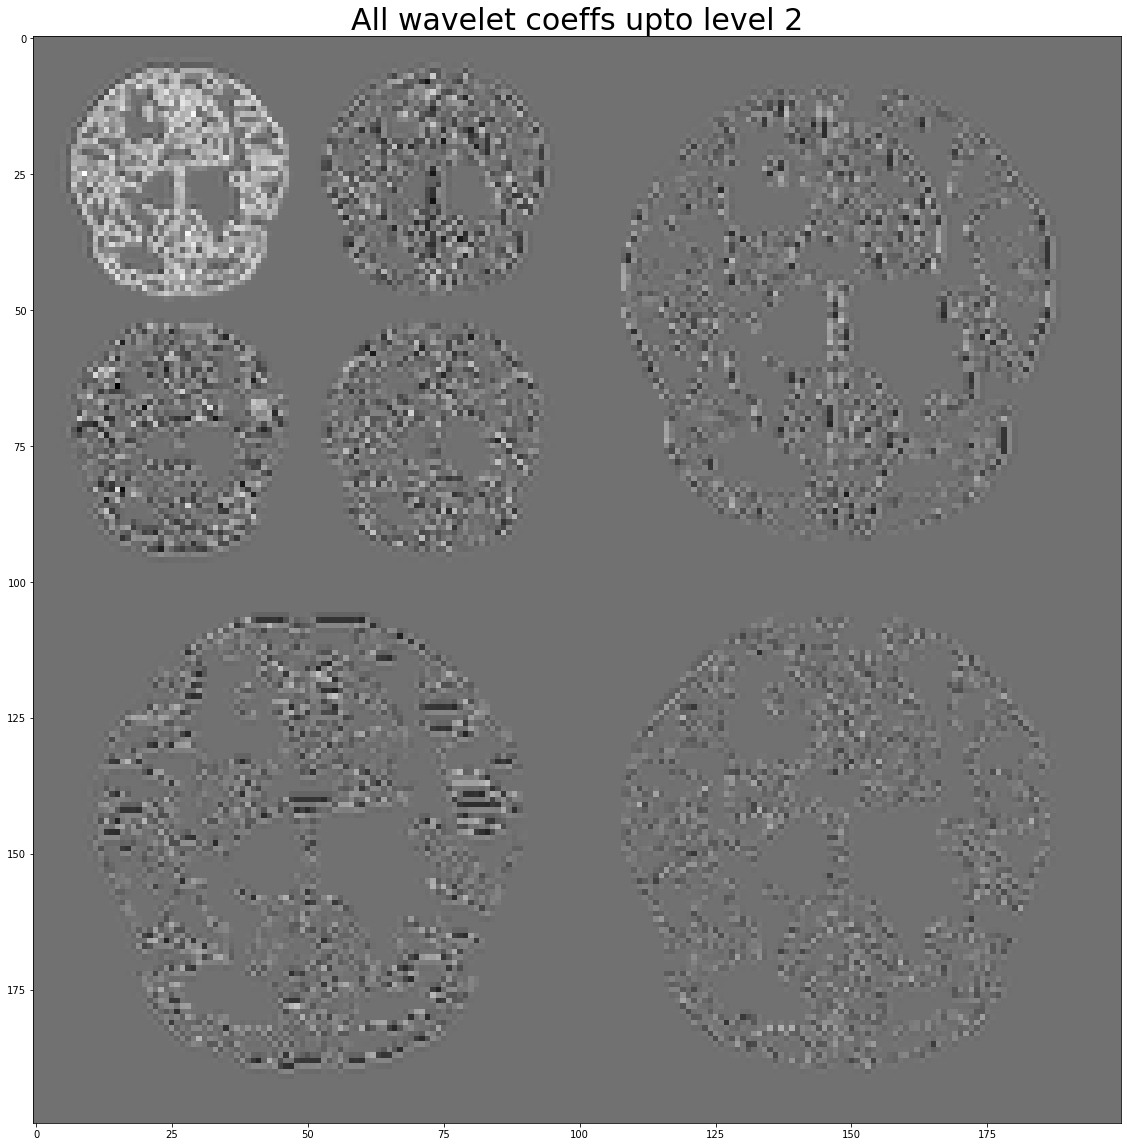

In [ ]:
arr,coeff_slices=pywt.coeffs_to_array(c)
plt.figure(figsize=(20,20))
plt.imshow(arr,cmap=plt.cm.gray)
plt.title('All wavelet coeffs upto level 2',fontsize=30)

Text(0.5, 1.0, 'Reconstructed image')

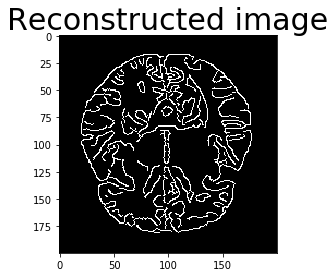

In [ ]:
plt.figure()
plt.imshow(imgr,cmap=plt.cm.gray)
plt.title('Reconstructed image',fontsize=30)

## Wavelet on img_canny1

In [ ]:
c=pywt.wavedec2(img_canny1,'db5',mode='periodization',level=2)

In [ ]:
imgr=pywt.waverec2(c,'db5',mode='periodization')
imgr=np.uint8(imgr)

In [ ]:
cA2=c[0]#Approximation coefficient
(cH1,cV1,cD1)=c[-1]#Detailed coefficients at level 1
(cH2,cV2,cD2)=c[-2]#Detailed coefficients at level 2

Text(0.5, 1.0, 'cD2: Diagonal Detailed coeff.')

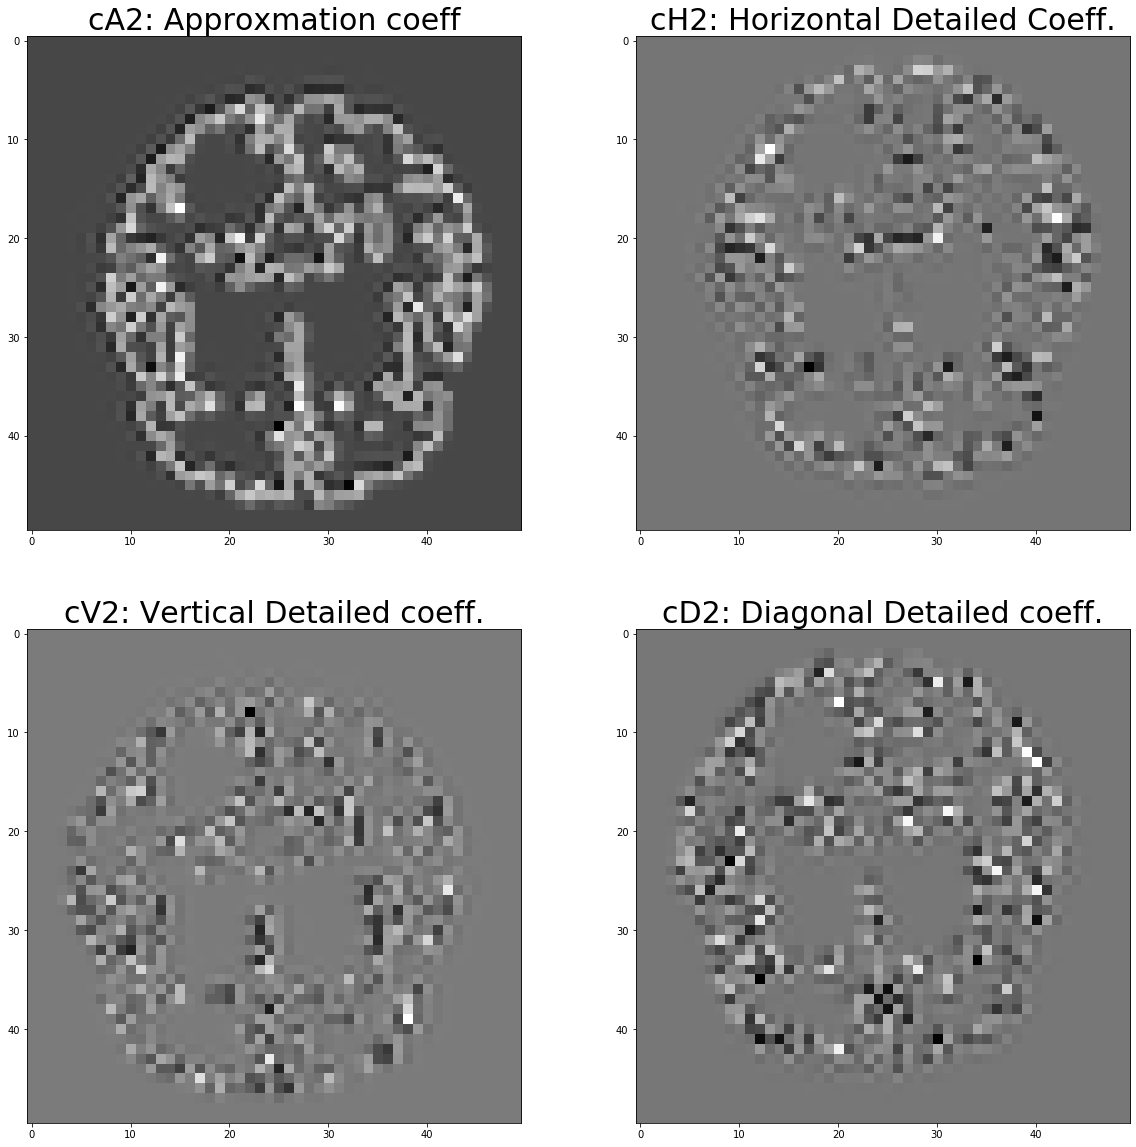

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap=plt.cm.gray)
plt.title('cA2: Approxmation coeff',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap=plt.cm.gray)
plt.title('cH2: Horizontal Detailed Coeff.',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.',fontsize=30)




Text(0.5, 1.0, 'All wavelet coeffs upto level 2')

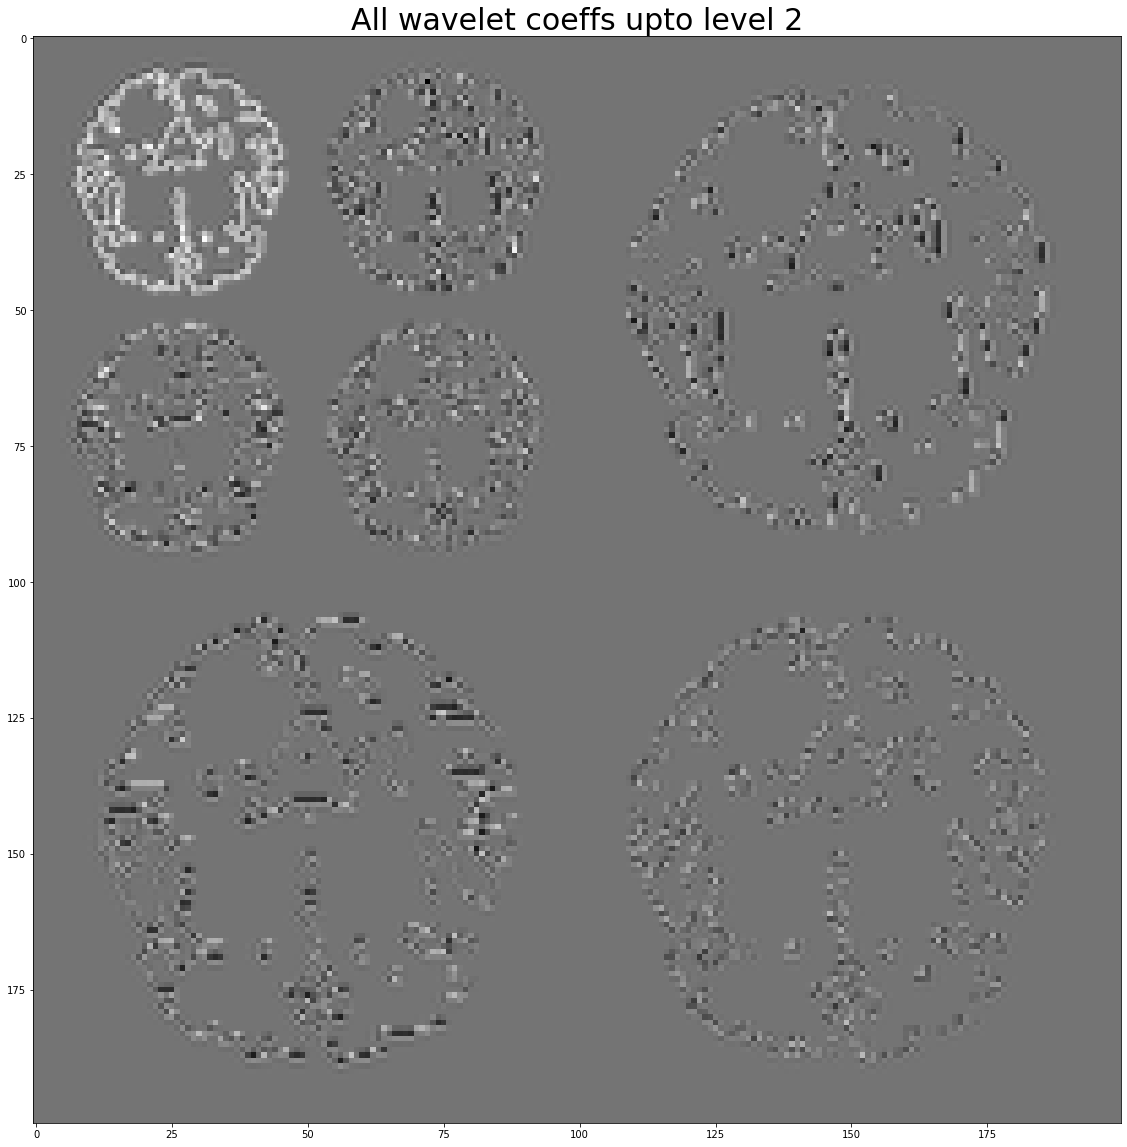

In [ ]:
arr,coeff_slices=pywt.coeffs_to_array(c)
plt.figure(figsize=(20,20))
plt.imshow(arr,cmap=plt.cm.gray)
plt.title('All wavelet coeffs upto level 2',fontsize=30)

Text(0.5, 1.0, 'Reconstructed image')

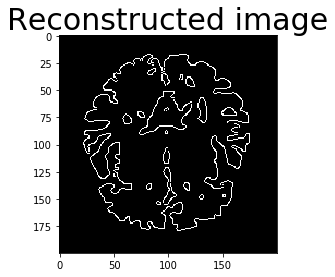

In [ ]:
plt.figure()
plt.imshow(imgr,cmap=plt.cm.gray)
plt.title('Reconstructed image',fontsize=30)

## Wavelet on img_canny2

In [ ]:
c=pywt.wavedec2(img_canny2,'db5',mode='periodization',level=2)

In [ ]:
imgr=pywt.waverec2(c,'db5',mode='periodization')
imgr=np.uint8(imgr)

In [ ]:
cA2=c[0]#Approximation coefficient
(cH1,cV1,cD1)=c[-1]#Detailed coefficients at level 1
(cH2,cV2,cD2)=c[-2]#Detailed coefficients at level 2

Text(0.5, 1.0, 'cD2: Diagonal Detailed coeff.')

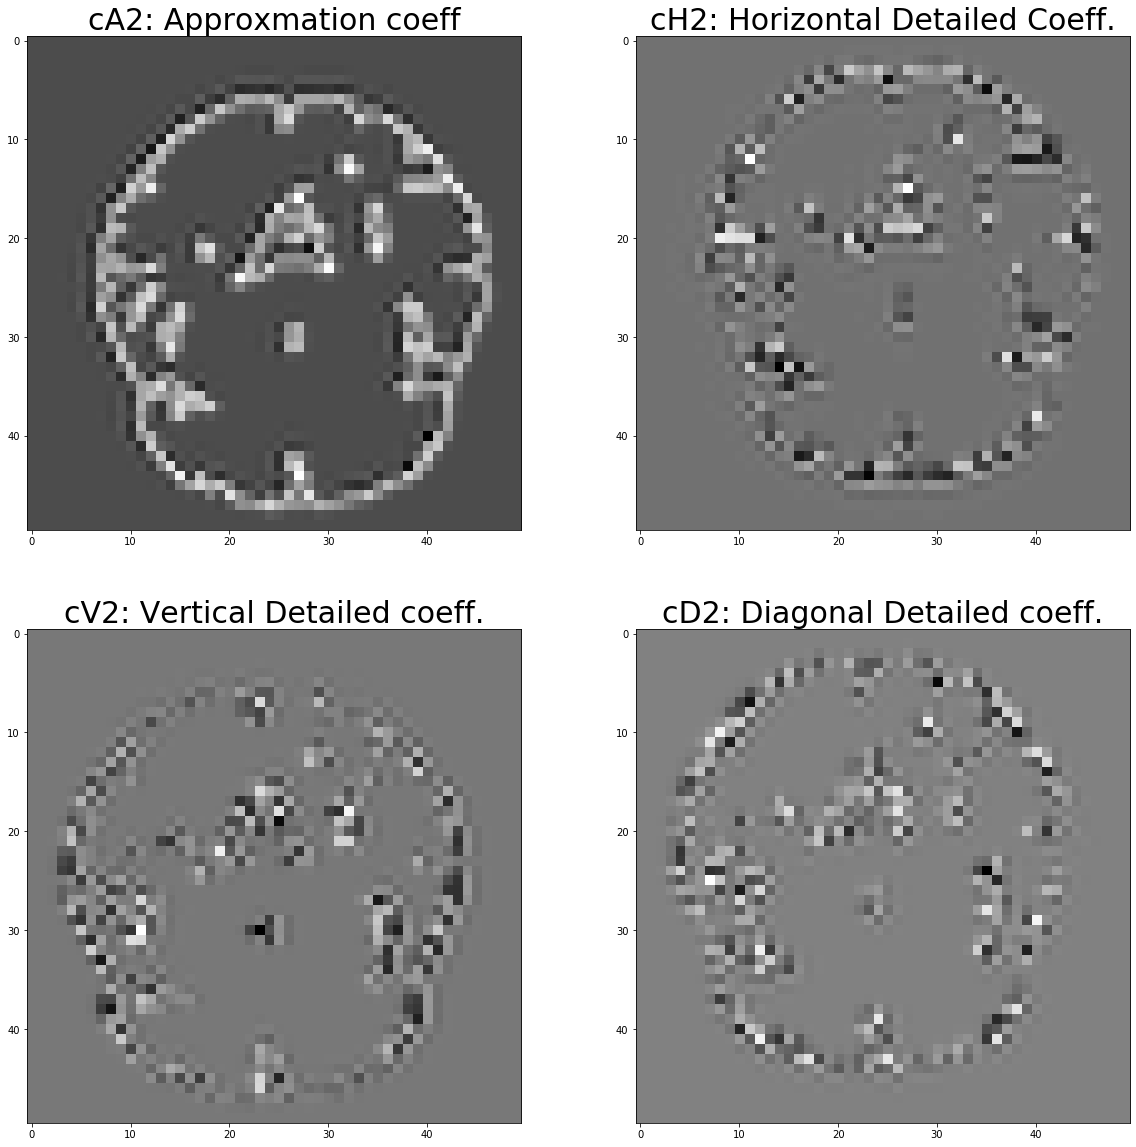

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap=plt.cm.gray)
plt.title('cA2: Approxmation coeff',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap=plt.cm.gray)
plt.title('cH2: Horizontal Detailed Coeff.',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.',fontsize=30)




Text(0.5, 1.0, 'All wavelet coeffs upto level 2')

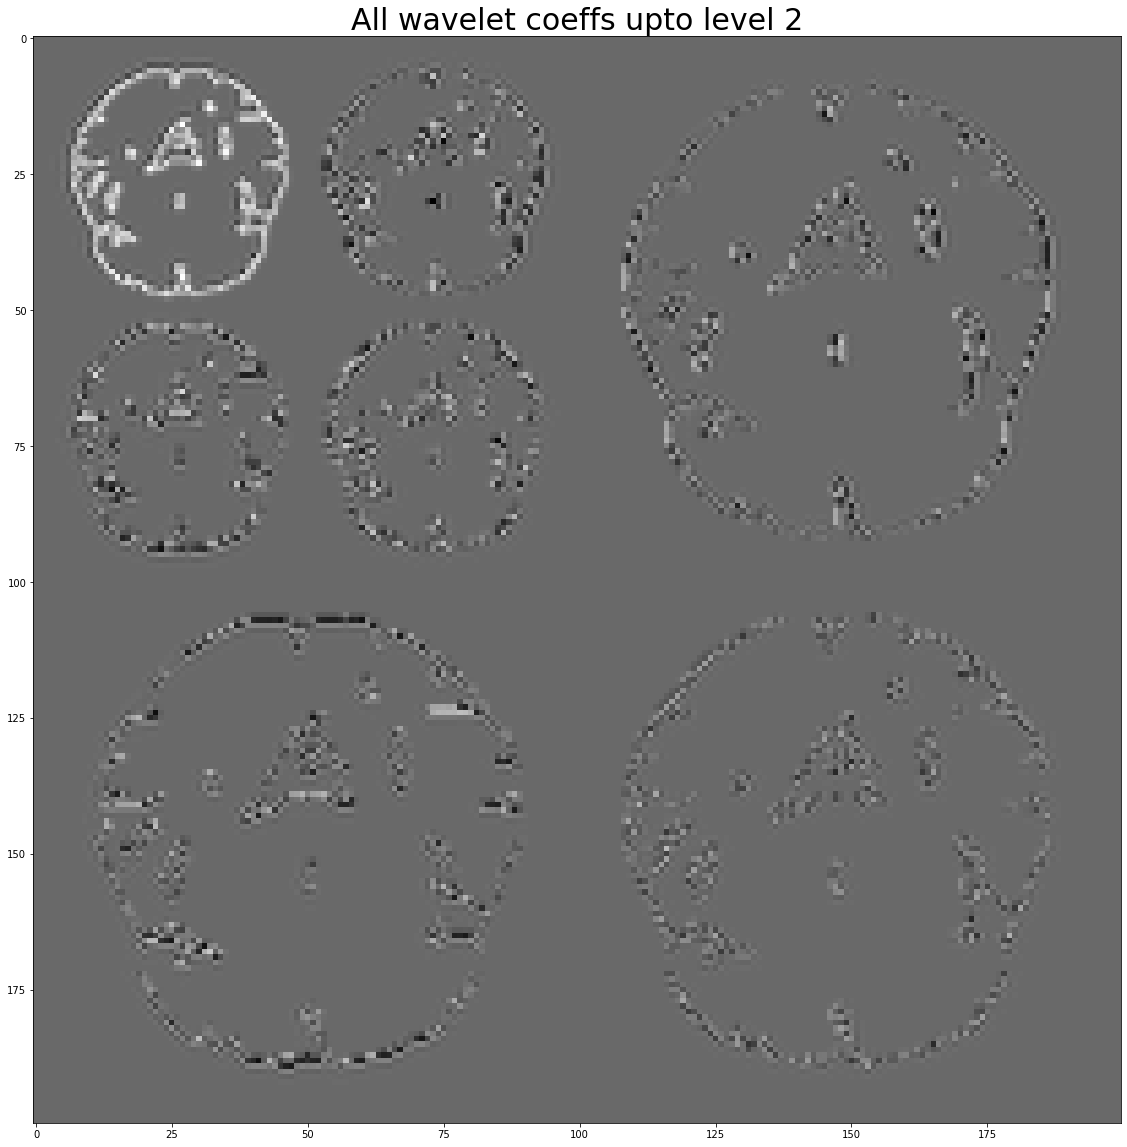

In [ ]:
arr,coeff_slices=pywt.coeffs_to_array(c)
plt.figure(figsize=(20,20))
plt.imshow(arr,cmap=plt.cm.gray)
plt.title('All wavelet coeffs upto level 2',fontsize=30)

Text(0.5, 1.0, 'Reconstructed image')

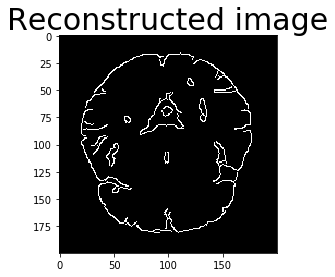

In [ ]:
plt.figure()
plt.imshow(imgr,cmap=plt.cm.gray)
plt.title('Reconstructed image',fontsize=30)

## Wavelet on img_canny3

In [ ]:
c=pywt.wavedec2(img_canny3,'db5',mode='periodization',level=2)

In [ ]:
imgr=pywt.waverec2(c,'db5',mode='periodization')
imgr=np.uint8(imgr)

In [ ]:
cA2=c[0]#Approximation coefficient
(cH1,cV1,cD1)=c[-1]#Detailed coefficients at level 1
(cH2,cV2,cD2)=c[-2]#Detailed coefficients at level 2

Text(0.5, 1.0, 'cD2: Diagonal Detailed coeff.')

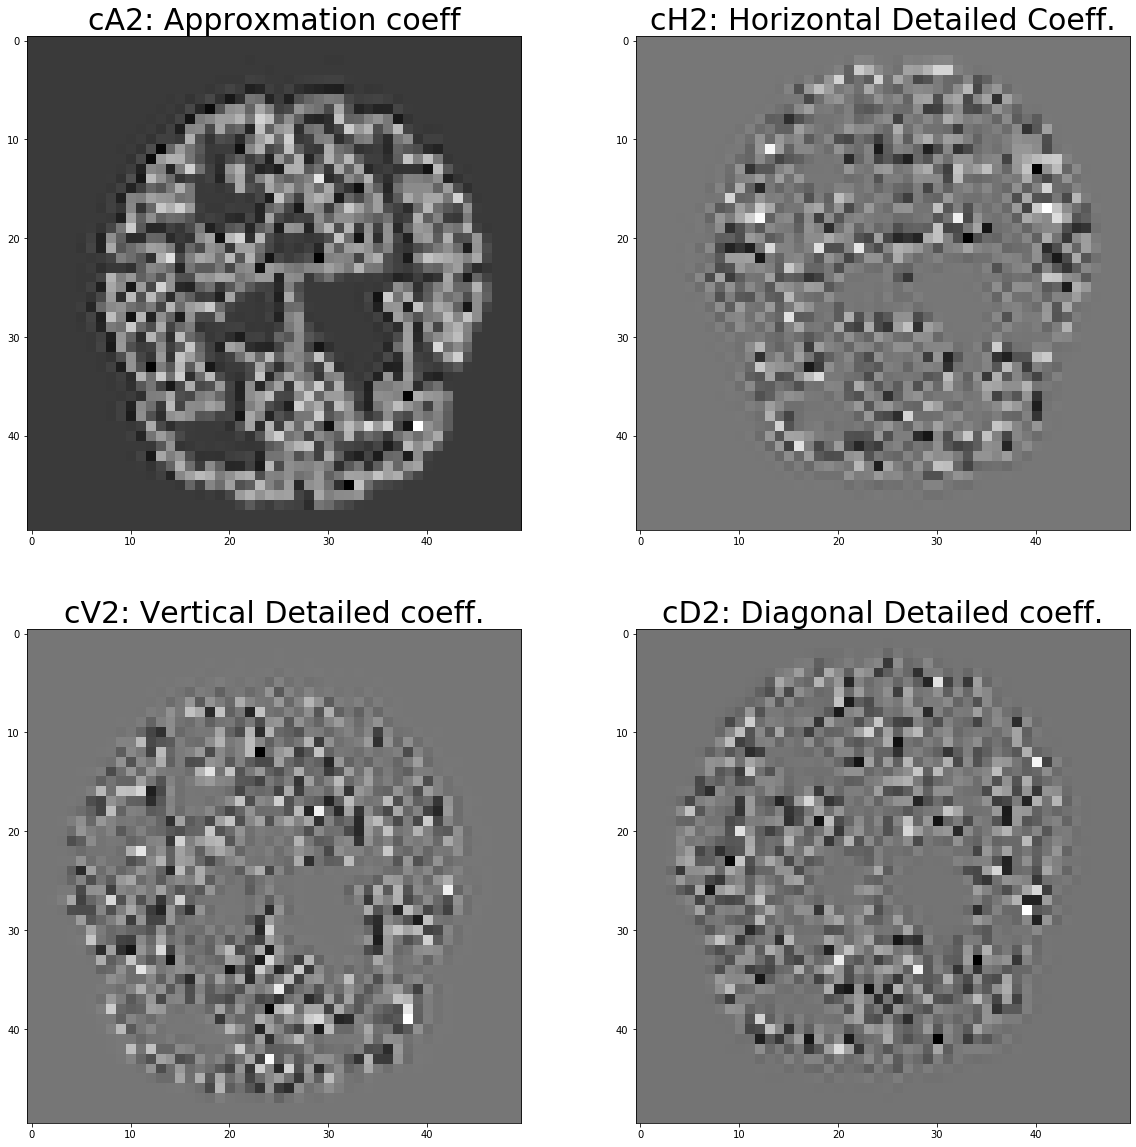

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap=plt.cm.gray)
plt.title('cA2: Approxmation coeff',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap=plt.cm.gray)
plt.title('cH2: Horizontal Detailed Coeff.',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.',fontsize=30)




Text(0.5, 1.0, 'All wavelet coeffs upto level 2')

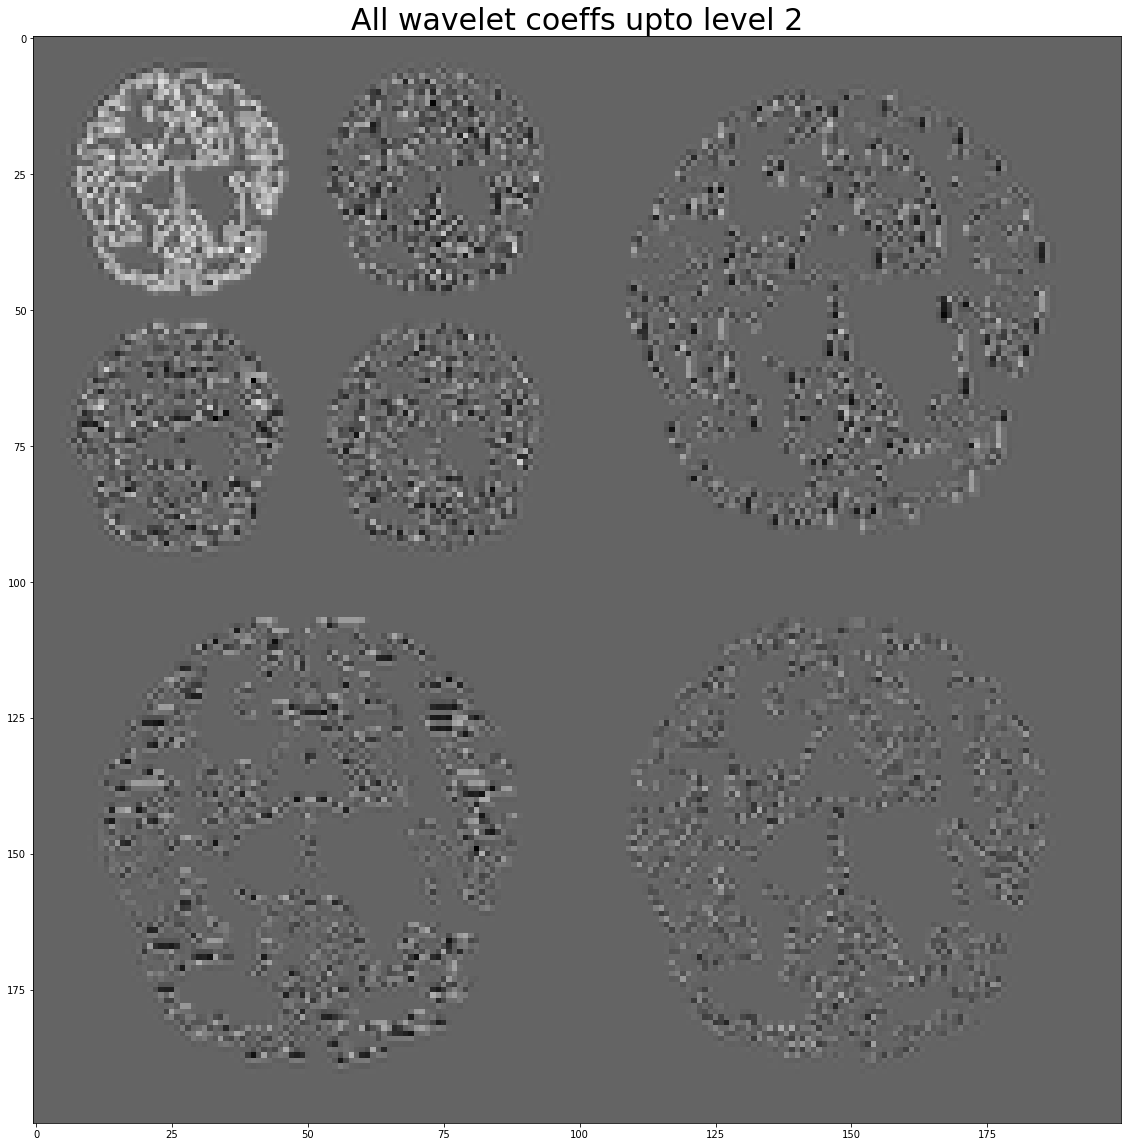

In [ ]:
arr,coeff_slices=pywt.coeffs_to_array(c)
plt.figure(figsize=(20,20))
plt.imshow(arr,cmap=plt.cm.gray)
plt.title('All wavelet coeffs upto level 2',fontsize=30)

Text(0.5, 1.0, 'Reconstructed image')

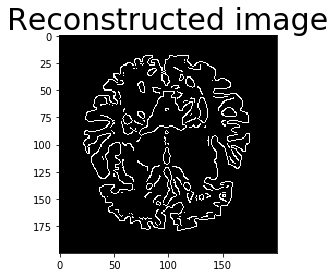

In [ ]:
plt.figure()
plt.imshow(imgr,cmap=plt.cm.gray)
plt.title('Reconstructed image',fontsize=30)